In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras import Sequential
from keras.layers import Dense
from helper import fn_plot_tf_hist, fn_plot_confusion_matrix
import time

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
inpDir = os.path.join( '..', 'input')


###moduleDir = 'MACHINE LEARNING'

outDir = os.path.join('output')
subDir = 'fashion_mnist'

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
tf.random.set_seed(RANDOM_STATE)

ALPHA = 0.001     # learning rate
#EPOCHS = 30
#BATCH_SIZE = 64


# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 150,
          'image.cmap': 'jet',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE=0.2

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

<Figure size 1500x600 with 0 Axes>

In [3]:
train_df=pd.read_csv(os.path.join(inpDir, 'fashion-mnist_train.csv'))
test_df=pd.read_csv(os.path.join(inpDir, 'fashion-mnist_test.csv'))

In [4]:
train_df

,label,pixel1,pixel2,pixel3,...,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,...,0,0,0,0
1,9,0,0,0,...,0,0,0,0
2,6,0,0,0,...,0,0,0,0
3,0,0,0,0,...,0,0,0,0
4,3,0,0,0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,...,0,0,0,0
59996,1,0,0,0,...,0,0,0,0
59997,8,0,0,0,...,0,0,0,0
59998,8,0,0,0,...,0,0,0,0


In [5]:
test_df

,label,pixel1,pixel2,pixel3,...,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,...,0,0,0,0
1,1,0,0,0,...,0,0,0,0
2,2,0,0,0,...,31,0,0,0
3,2,0,0,0,...,222,56,0,0
4,3,0,0,0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,...,1,0,0,0
9996,6,0,0,0,...,28,0,0,0
9997,8,0,0,0,...,42,0,1,0
9998,8,0,1,3,...,0,0,0,0


In [6]:
train_df.shape, test_df.shape

((60000, 785), (10000, 785))

In [7]:
class_names = {0: 't-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [8]:
train_df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

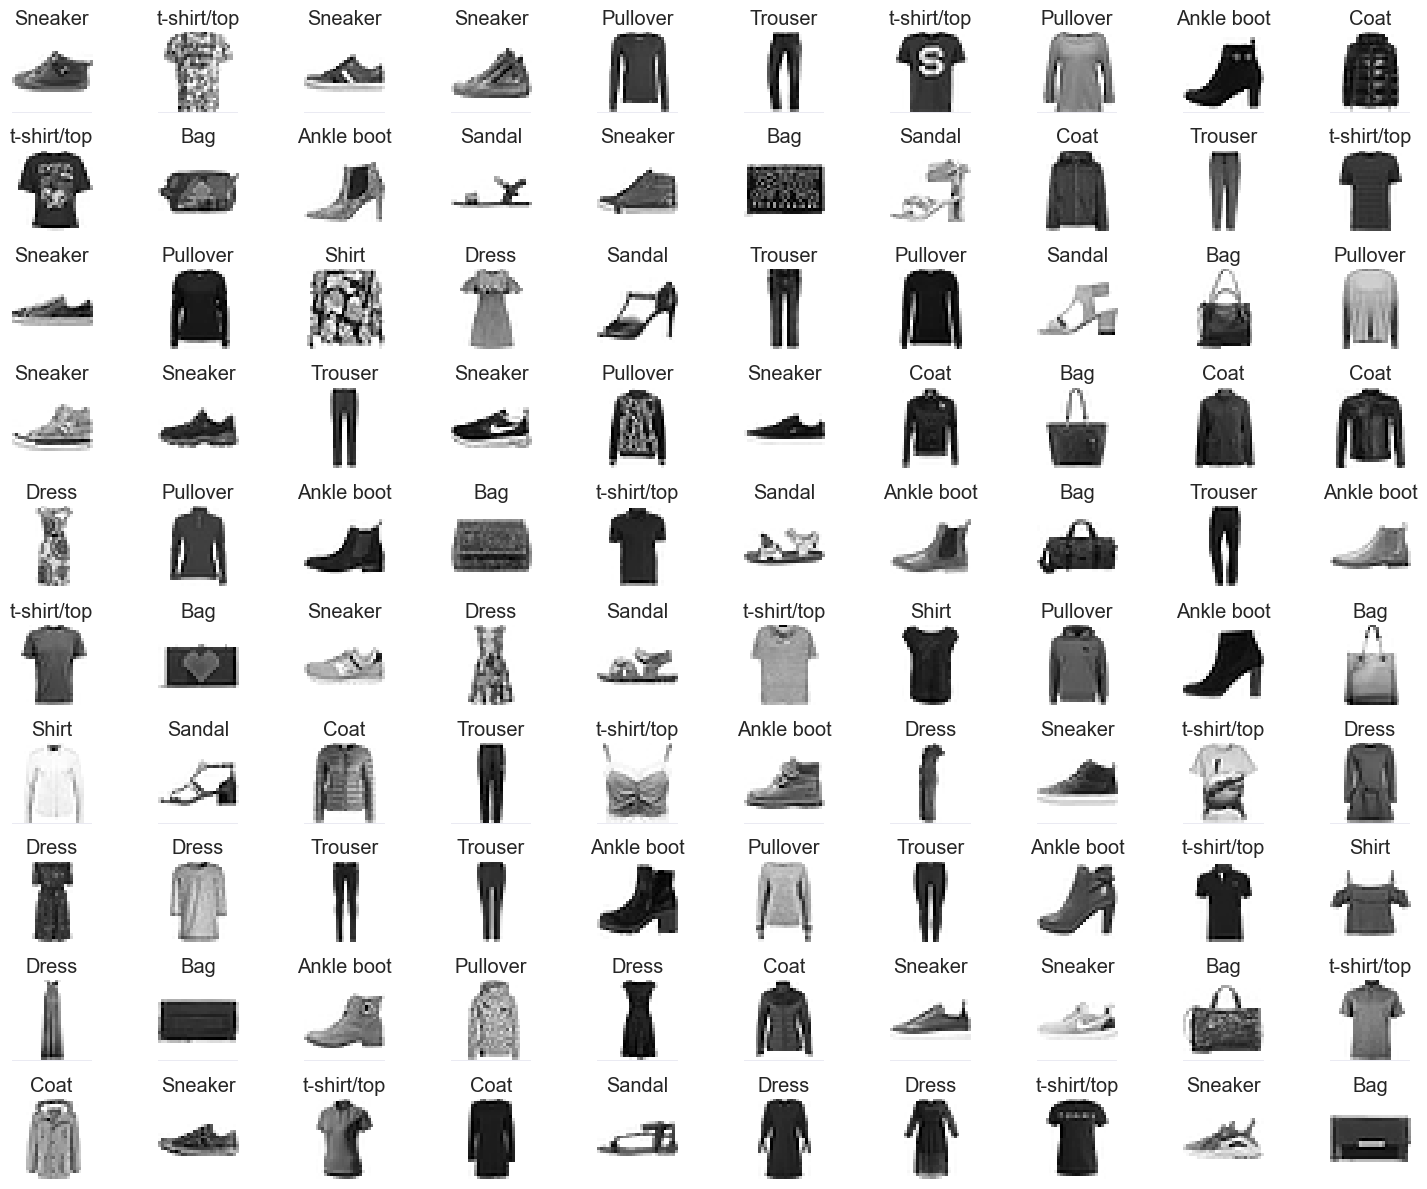

In [9]:
plot_df = train_df.sample(n = 100)

fig = plt.figure(figsize = (15,12))

i = 0

for _ , row in plot_df.iterrows():
    i += 1
    image = row.values[1:].reshape(28,28)
    ax = fig.add_subplot(10,10,(i), xticks = [], yticks = [])
    ax.imshow(image, cmap = plt.cm.binary)
    label = row.iloc[0]
    ax.set_title(class_names[label])
plt.tight_layout()

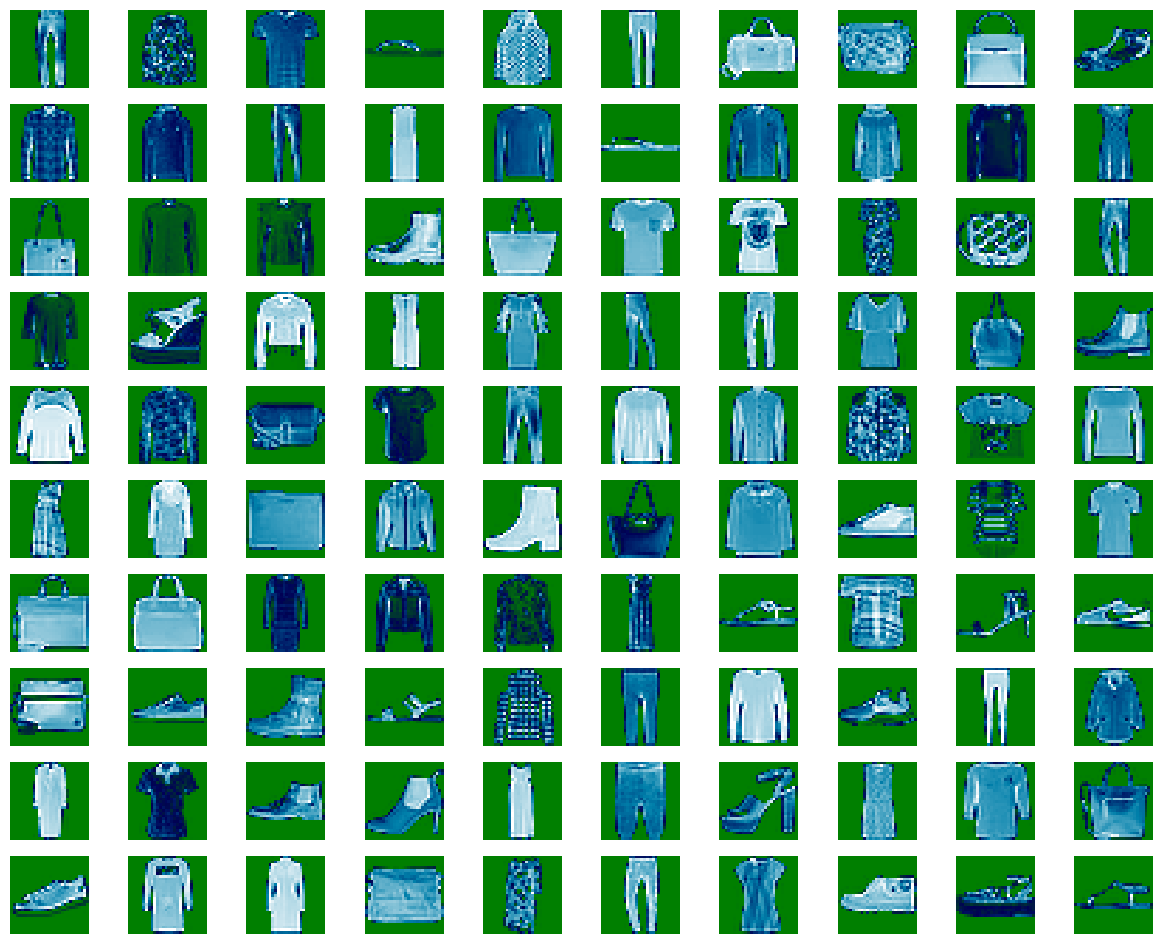

In [10]:
plot_df = train_df.sample(n = 100)

fig = plt.figure(figsize = (15,12))

i = 0

for _ , row in plot_df.iterrows():
    i += 1
    image = row.values[1:].reshape(28,28)
    ax = fig.add_subplot(10,10,(i), xticks = [], yticks = [])
    ax.imshow(image, cmap = 'ocean')

In [11]:
cols = train_df.columns
for col in cols:
    print(f'\nColumns Name: {col} : {train_df[col].unique()}')


Columns Name: label : [2 9 6 0 3 4 5 8 7 1]

Columns Name: pixel1 : [ 0 14  7  3 16  1  4  2]

Columns Name: pixel2 : [ 0  1  3 10  6  2  7  5 16 14 13  9 34 15  4 11 36]

Columns Name: pixel3 : [  0   2   1  10   3   6   4   5   7  56  34  32  16  14  78  25  13   9
   8  52  35  30  23  54 226  15 106]

Columns Name: pixel4 : [  0   1   5   2   3  20  46  87   4  16  12   6  64  36  52  13   7 164
 110  14  92 106 120 105  53  70   9  23  49  25  26  34 121  21  17  10
  41  18  28  80  56 144  22  54  55  50  90 150  19 109  83 132  48  11
  32 145  39  96  15  58   8  68  82 146  86]

Columns Name: pixel5 : [  0   2   4   1   5   3  26  14  39  62  15  16  84   7  88  41  65  17
  35  61  11  21  10   6  18 119 162 106  34  12 217  33  24  37  13 185
  38  71  73   9  40  56  68 171  89  97  91  23  59  42  77 103  29 148
 140  31  45 201   8  95 133  80  44  43  27  20  32  58 123  22 116  66
  60  53 145  85 100  54 210 166 113  19  28 227  30  51  64  96  75  70
  90  82 115 15


Columns Name: pixel254 : [  4   0  61  42  68  60 255  73 254   5  70   1 109  47   3 123 208   6
  34 171 127 189 161 108   8 149  98 131 172 183   2 192  51   9 186 133
  53 145 225  41 226 113  67  88 236 151 180 205  46 147  65 241   7  10
  43 231 247 185 166 232 103 121 187 212 112 116 102  44 173  18 188  91
  77 128 163  15  28 190  31 253  89 160  57 200 119  52 162 176  24  36
  40 159 193 105  90 165  59  12 101  58 244 224 110  29 217 246  48 120
 168  97  30 158 152 169 249  23 199  54 153 233  11 178 220  99 124 207
 222 132  87 136 252 221  96  80 250 194 148  82  55  16 100 228  39 242
 191 204 126  72  17 138 243 179 130  93 182  13  95 164 198 118 154 129
 216  78  56  92 235  66 218 117  64 156  21 227  14  25 196 210 142  85
 209 137  74 240  49 114 167 248 238 181 140 201 177 155  19  81 229  32
 139 157  83 134  22  38  50 125 146 135  86  35 215  94 122 239  69 170
 104 197 141  84  45 230 206 175  27  33  76 150  63 115  71 203  75 211
  26 213  20 202 223 174 


Columns Name: pixel504 : [ 25  30   0  54  31 100   8  62 105  12  43 114  15   2   1  41   6  58
  48  61 102 164  24  22  53 103 107 117  79  57  32  33  84 157 167  55
 116  11  96  21  95 134  93  86  71   4  59  35 101 127 131  98 130  13
 146 140  70  80  68 181  97 149  29  64  82  16 162  42 119  19  44 150
 113 139   3  38  78 151  94 120 106 202  49  67  23  26 180  10  17   7
  66 145  90  50  39  36 142 124  89  40  69  51  52 168 152 196  47  87
 138  85 209  91  27 135 108 133  37  14 118  45 197  81 158 165  77  65
  20  92   9  63  60 126  75  74  76 175 110 186  28  18  88 104  46  34
 132 136 179 148 112  83  72  56 188 173 156 147  99 128 191 176 109   5
 123 184 144 161 143 159 200 137 121 169 187 155 171 160 111 190 199 214
 125 122 185 172  73 182 174 129 255 194 141 163 115 170 153 203 178 166
 244 183 233 193 206 154 211 225 177 254 252 201 189 251 192 198 195 216
 205 208 213 238 219 204 224 230 215 222 217 218 210 207 227 221 220 228
 212 226 246 223 232]

Co


Columns Name: pixel755 : [  0  32 145 131  96 207 117  72 184  12   1 255   3 196 246 202 222   5
 176   4 205  19 119  49  46 249 214  83 106  63   2 167  88  30 179 235
 210  35  89  14 186  20  80 250  90  22 114   6  48  78 127 103 111 171
 139  81 124 157 115  10  36  84 201 102 165  77  58  93 162  68 243 216
  44  21 105 142  24  86 178  87 213  92 159   8 154 169 130 254  73 166
  99  33  94  61 209 174  45  54  47 113  82 109  38  51 100 181 200 192
  62 173 187  28  23  18  34 147  41 231 152 121 252  65  53  39 125  17
 206 218 177 170 251  16  71 143  13 197 248  91 101 155 104 193  11  57
  76  95 107  52 194  29 126 134 241 132 137  69 112  56 189  26  50 215
  59  74 156  64 158 234   7 140 224 118  67 242 223  40  42 198 239 253
 185 153 110   9 160 136 247 168 144 182 164 172  70  75 123 204 141 128
  31 149 122  98 227  15  37 217 188 129  43 161 180  55 208 219 163 116
 230 175 191 148 133  60 225 233 195 244  27 211  25 232 236  66 183 120
 238 151 150 138 212 237 

In [12]:
X_train = train_df.drop('label', axis = 1).to_numpy()
y_train = train_df['label'].to_numpy()

In [13]:
X_test = test_df.drop('label', axis = 1).to_numpy()
y_test = test_df['label'].to_numpy()

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [15]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(397, activation = 'relu'),
    tf.keras.layers.Dense(196, activation = 'relu'),
    tf.keras.layers.Dense(49, activation = 'relu'),
    tf.keras.layers.Dense(10)       # no activation here
])

In [17]:
X_train[:1].shape

(1, 784)

In [18]:
prediction = model(X_train[:1]).numpy()
prediction.sum()

-0.037806608

In [19]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 397)                  311645    
                                                                 
 dense_1 (Dense)             (1, 196)                  78008     
                                                                 
 dense_2 (Dense)             (1, 49)                   9653      
                                                                 
 dense_3 (Dense)             (1, 10)                   500       
                                                                 
Total params: 399806 (1.53 MB)
Trainable params: 399806 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [22]:
y_train[:1]

array([2], dtype=int64)

In [23]:
loss_fn(y_train[:1], prediction).numpy()

2.2481413

In [24]:
model.compile(optimizer = 'rmsprop', loss = loss_fn, metrics = ['accuracy'])

In [25]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    batch_size = 120,
                    epochs = 30)

Epoch 1/30


500/500 [==============================] - 2s 3ms/step - loss: 0.5693 - accuracy: 0.7907 - val_loss: 0.5079 - val_accuracy: 0.7970
Epoch 2/30
500/500 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8565 - val_loss: 0.4140 - val_accuracy: 0.8445
Epoch 3/30
500/500 [==============================] - 1s 3ms/step - loss: 0.3489 - accuracy: 0.8713 - val_loss: 0.3564 - val_accuracy: 0.8692
Epoch 4/30
500/500 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.8810 - val_loss: 0.3088 - val_accuracy: 0.8837
Epoch 5/30
500/500 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.8871 - val_loss: 0.3212 - val_accuracy: 0.8850
Epoch 6/30
500/500 [==============================] - 1s 3ms/step - loss: 0.2846 - accuracy: 0.8928 - val_loss: 0.3226 - val_accuracy: 0.8792
Epoch 7/30
500/500 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.8982 - val_loss: 0.2933 - val_accuracy: 0.8932
Epoc

In [26]:
model.evaluate(X_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.4892 - accuracy: 0.8951 - 312ms/epoch - 997us/step


[0.48915478587150574, 0.8950999975204468]

In [27]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.57,0.79,0.51,0.80
1,0.39,0.86,0.41,0.84
2,0.35,0.87,0.36,0.87
3,0.32,0.88,0.31,0.88
4,0.30,0.89,0.32,0.88


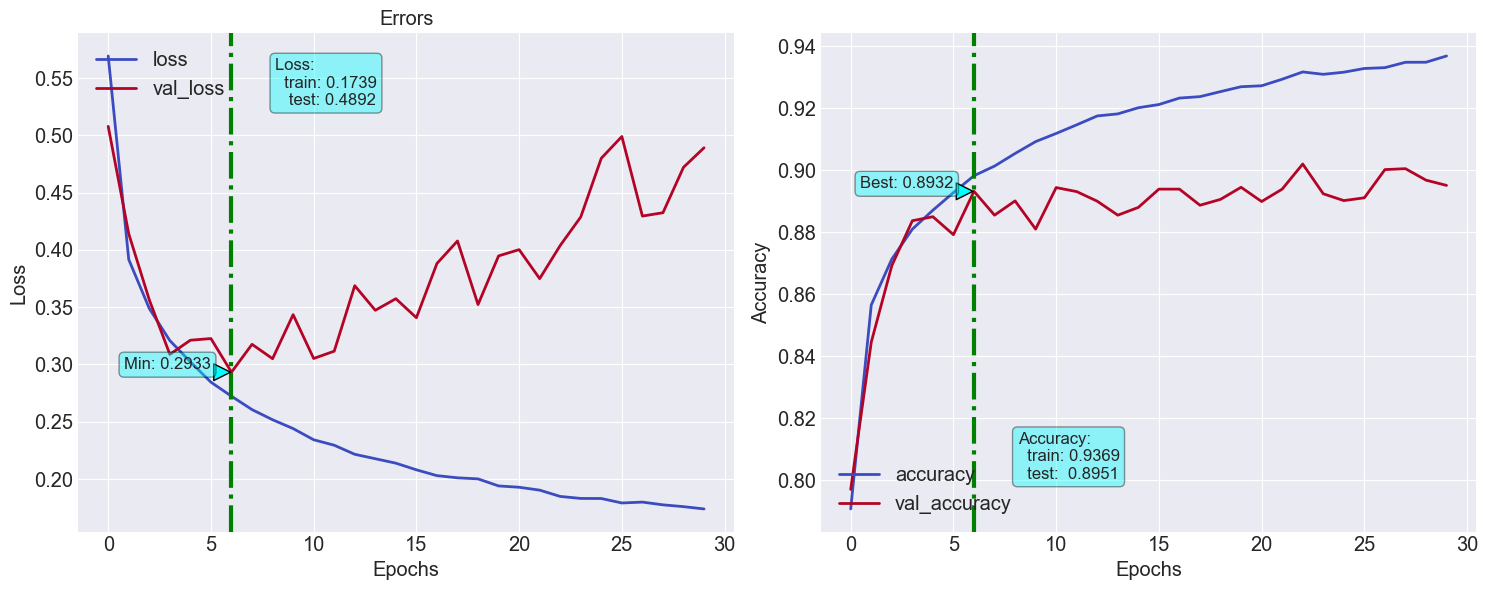

In [28]:
fn_plot_tf_hist(loss_df)

In [29]:
y_logits = model(X_train)
y_pred1 = tf.nn.softmax(y_logits).numpy()

In [30]:
y_pred1

array([[0.002, 0.   , 0.934, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.001, 0.   , 0.999],
       [0.   , 0.   , 0.002, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ]], dtype=float32)

In [31]:
pred_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [32]:
y_pred = pred_model(X_train).numpy()
y_pred

array([[0.002, 0.   , 0.934, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.001, 0.   , 0.999],
       [0.   , 0.   , 0.002, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ]], dtype=float32)

In [33]:
print(classification_report(y_train, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6000
           1       1.00      1.00      1.00      6000
           2       0.85      0.90      0.87      6000
           3       0.94      0.97      0.95      6000
           4       0.87      0.85      0.86      6000
           5       0.99      1.00      1.00      6000
           6       0.89      0.80      0.84      6000
           7       0.99      0.96      0.98      6000
           8       0.98      1.00      0.99      6000
           9       0.96      0.99      0.98      6000

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



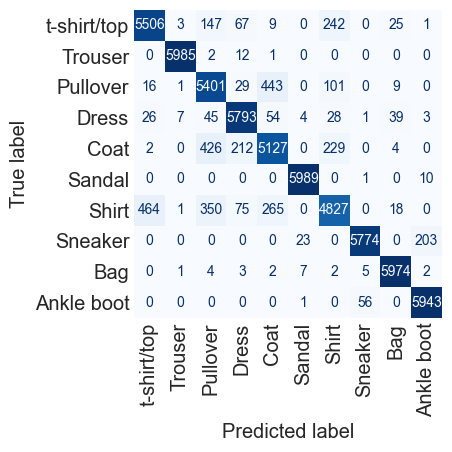

In [34]:
fn_plot_confusion_matrix(y_train,y_pred.argmax(axis = 1), class_names)

In [35]:
y_pred = pred_model(X_test).numpy()
y_pred

array([[0.977, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.   , 0.913, 0.025, ..., 0.   , 0.   , 0.   ]], dtype=float32)

In [36]:
print(classification_report(y_test, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.80      0.83      0.81      1000
           3       0.90      0.92      0.91      1000
           4       0.84      0.83      0.83      1000
           5       0.97      0.96      0.96      1000
           6       0.77      0.69      0.73      1000
           7       0.96      0.93      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.92      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.89      0.90      0.89     10000



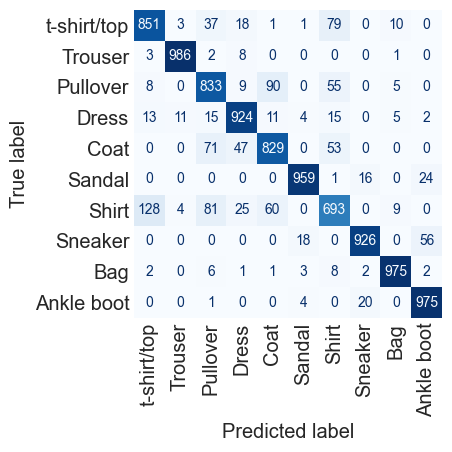

In [37]:
fn_plot_confusion_matrix(y_test,y_pred.argmax(axis = 1), class_names)